In [1]:
import os
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt

In [2]:
images=[]
labels=[]
for filename in os.listdir('/content/drive/MyDrive/Brain Tumour/archive (6)/brain_tumor_dataset'):
  new_path=os.path.join('/content/drive/MyDrive/Brain Tumour/archive (6)/brain_tumor_dataset',filename)
  for files in os.listdir(new_path):
    image_path=os.path.join(new_path,files)
    img=cv2.imread(image_path)
    img=cv2.resize(img,(220,220))
    images.append(img)
    labels.append(filename)

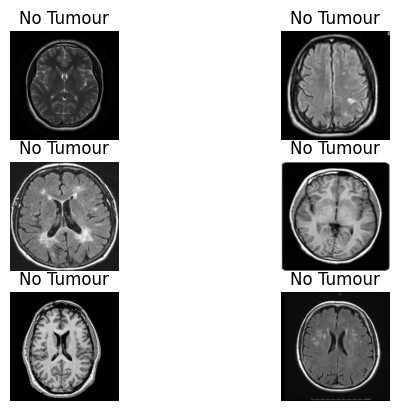

In [3]:
for i in range(1,7):
  plt.subplot(3,2,i)
  plt.imshow(images[i])
  plt.axis('off')
  plt.title('No Tumour')

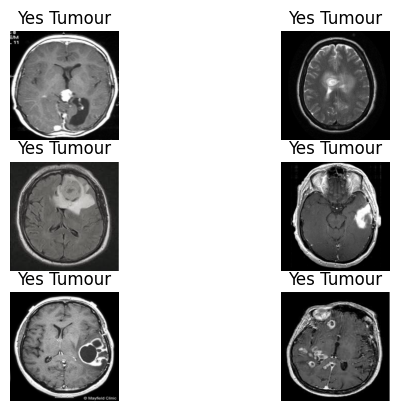

In [4]:
for i in range(1,7):
  plt.subplot(3,2,i)
  plt.imshow(images[i+230])
  plt.axis('off')
  plt.title('Yes Tumour')

In [5]:
images=np.array(images)

In [6]:
labels=np.array(labels)

In [7]:
from sklearn.preprocessing import LabelEncoder
L=LabelEncoder()
labels=L.fit_transform(labels)

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(images,labels,test_size=0.2,random_state=69,shuffle=True)

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Concatenate

def unet(input_shape=(220, 220, 3)):
    model = Sequential()


    model.add(Conv2D(128, (3, 3), activation='relu', padding='same',input_shape=input_shape))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))


    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))




    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))


    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))



    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units=128,activation='relu'))
    model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

    return model
model = unet()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 220, 220, 128)     3584      
                                                                 
 conv2d_12 (Conv2D)          (None, 220, 220, 128)     147584    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 110, 110, 128)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 110, 110, 256)     295168    
                                                                 
 conv2d_14 (Conv2D)          (None, 110, 110, 256)     590080    
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 55, 55, 256)       0         
 g2D)                                                 

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest'
)

datagen.fit(x_train)

In [14]:
earlystopping=tf.keras.callbacks.EarlyStopping(patience=4,monitor='val_accuracy')
history = model.fit(datagen.flow(x_train, y_train,batch_size=16), epochs=50, validation_data=(x_test, y_test),callbacks=[earlystopping])

Epoch 1/50
13/13 [==============================] - 96s 5s/step - loss: 470.3417 - accuracy: 0.5594 - val_loss: 0.6250 - val_accuracy: 0.6863
Epoch 2/50
13/13 [==============================] - 9s 680ms/step - loss: 0.6905 - accuracy: 0.6238 - val_loss: 0.6123 - val_accuracy: 0.6667
Epoch 3/50
13/13 [==============================] - 9s 686ms/step - loss: 0.6604 - accuracy: 0.6188 - val_loss: 0.5987 - val_accuracy: 0.6863
Epoch 4/50
13/13 [==============================] - 10s 753ms/step - loss: 0.6689 - accuracy: 0.5891 - val_loss: 0.5585 - val_accuracy: 0.6863
Epoch 5/50
13/13 [==============================] - 10s 740ms/step - loss: 0.6573 - accuracy: 0.6386 - val_loss: 0.5337 - val_accuracy: 0.7255
Epoch 6/50
13/13 [==============================] - 9s 683ms/step - loss: 0.6205 - accuracy: 0.6238 - val_loss: 0.6583 - val_accuracy: 0.7059
Epoch 7/50
13/13 [==============================] - 9s 681ms/step - loss: 0.6794 - accuracy: 0.5792 - val_loss: 0.5724 - val_accuracy: 0.6863
Epoc

In [15]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((202, 220, 220, 3), (51, 220, 220, 3), (202,), (51,))

In [22]:
model = Sequential()

model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(220, 220, 3), padding='same'))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps and add Fully Connected layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

# Output layer for binary classification
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()




Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_65 (Conv2D)          (None, 220, 220, 32)      896       
                                                                 
 conv2d_66 (Conv2D)          (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 110, 110, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_67 (Conv2D)          (None, 110, 110, 64)      18496     
                                                                 
 conv2d_68 (Conv2D)          (None, 110, 110, 64)      36928     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 55, 55, 64)        0         
 ng2D)                                                

In [23]:

earlystopping=tf.keras.callbacks.EarlyStopping(patience=4,monitor='val_accuracy')
history = model.fit(datagen.flow(x_train, y_train,batch_size=16), epochs=50, validation_data=(x_test, y_test),callbacks=[earlystopping])

Epoch 1/50
13/13 [==============================] - 14s 505ms/step - loss: 3.7479 - accuracy: 0.5198 - val_loss: 0.6369 - val_accuracy: 0.6863
Epoch 2/50
13/13 [==============================] - 4s 284ms/step - loss: 0.6784 - accuracy: 0.5743 - val_loss: 0.6652 - val_accuracy: 0.7647
Epoch 3/50
13/13 [==============================] - 2s 187ms/step - loss: 0.6667 - accuracy: 0.6535 - val_loss: 0.5615 - val_accuracy: 0.7647
Epoch 4/50
13/13 [==============================] - 2s 187ms/step - loss: 0.6635 - accuracy: 0.5792 - val_loss: 0.5708 - val_accuracy: 0.6863
Epoch 5/50
13/13 [==============================] - 2s 193ms/step - loss: 0.6734 - accuracy: 0.6040 - val_loss: 0.5824 - val_accuracy: 0.6863
Epoch 6/50
13/13 [==============================] - 3s 207ms/step - loss: 0.6550 - accuracy: 0.6139 - val_loss: 0.5614 - val_accuracy: 0.7255


In [25]:
model.save('/content/drive/MyDrive/Brain Tumour/archive (6)/brain_tumor_dataset/Tumour_detection.h5')

In [26]:
y_pred=model.predict(x_test)

2/2 [==============================] - 0s 46ms/step


In [27]:
import numpy as np

# Assuming y_pred is an array of predicted probabilities
y_pred = np.array(y_pred)

# Set a threshold value (e.g., 0.5)
threshold = 0.5

# Convert probabilities to binary values
y_pred = (y_pred > threshold).astype(int)

print(y_pred)


[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]]


In [29]:
y_pred=y_pred.reshape(51,)
fd=pd.DataFrame({'Predicted':y_pred,'Real':y_test})

In [30]:
fd

,Predicted,Real
0,1,0
1,1,1
2,1,0
3,1,0
4,1,1
5,1,1
6,1,1
7,1,1
8,1,0
9,1,0


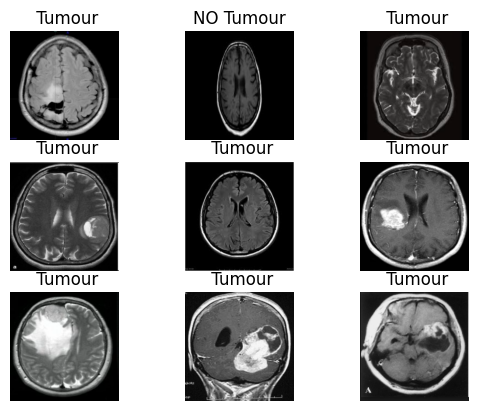

In [33]:
for i in range(1,10):
  plt.subplot(3,3,i)
  plt.imshow(x_test[i+20])
  plt.axis('off')
  if y_pred[i+20]==0:
    plt.title('NO Tumour')
  else:
    plt.title(' Tumour')

In [35]:
from sklearn.metrics import confusion_matrix
cms=confusion_matrix(y_test,y_pred)

1)Above model is not giving any false negative that it is predicting Tumour very weel

2)Its is lacking in predicting No Tumour

In [37]:
cms

array([[ 2, 14],
       [ 0, 35]])